In [44]:
import numpy as np # Numpy(넘파이) 패키지 임포트
import pandas as pd #pandas(판다스) 패키지 임포트
import seaborn as sns #Seaborn(씨본) 패키지 임포트
import matplotlib.pyplot as plt # 맷플롯립 import 하기
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False

In [69]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [70]:
df.loc[df['sex'] == 'female', 'sex'] = 0
df.loc[df['sex'] == 'male', 'sex'] = 1
df.loc[df['smoker'] == 'no', 'smoker'] = 0
df.loc[df['smoker'] == 'yes', 'smoker'] = 1
df = df.astype({'sex' : int})
df = df.astype({'smoker' : int})
df['bmi'] = df['bmi'] // 5 * 5
df['age'] = df['age'] // 10 * 10
df

,age,sex,bmi,children,smoker,region,charges
0,10,0,25.0,0,1,southwest,16884.92400
1,10,1,30.0,1,0,southeast,1725.55230
2,20,1,30.0,3,0,southeast,4449.46200
3,30,1,20.0,0,0,northwest,21984.47061
4,30,1,25.0,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.0,3,0,northwest,10600.54830
1334,10,0,30.0,0,0,northeast,2205.98080
1335,10,0,35.0,0,0,southeast,1629.83350
1336,20,0,25.0,0,0,southwest,2007.94500


In [71]:
df_1 = df
df_1.loc[df_1['region'] == 'southwest', 'region'] = 0 # 웨스트 0, 이스트 1
df_1.loc[df_1['region'] == 'southeast', 'region'] = 1
df_1.loc[df_1['region'] == 'northwest', 'region'] = 0
df_1.loc[df_1['region'] == 'northeast', 'region'] = 1
df_1 = df_1.astype({'region':int})

- df_1은 지역 웨스트0, 이스트1

In [72]:
df_2 = df
df_2.loc[df_2['region'] == 'southwest', 'region'] = 1
df_2.loc[df_2['region'] == 'southeast', 'region'] = 1
df_2.loc[df_2['region'] == 'northwest', 'region'] = 0
df_2.loc[df_2['region'] == 'northeast', 'region'] = 0
df_2 = df_2.astype({'region':int})

- df_2는 지역 사우스 1, 놀스 0

<Axes: title={'center': '그래프 테스트'}>

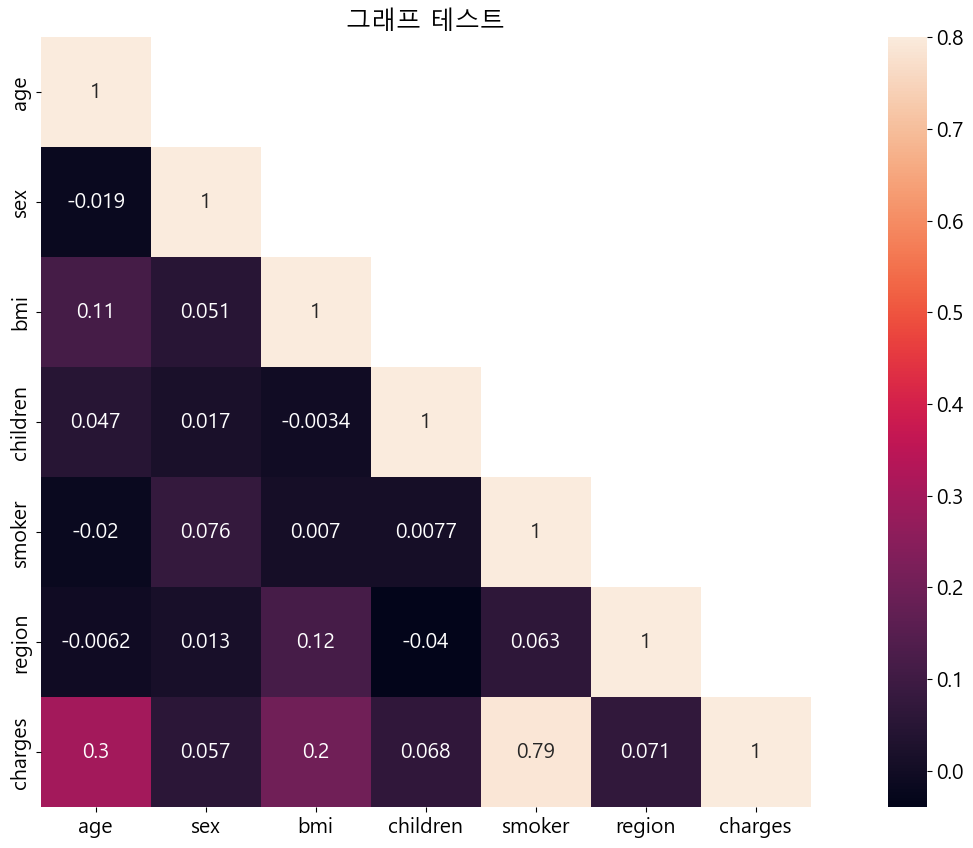

In [75]:
# 상관행렬
corrMatt = df_1.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)]=False
fig,ax = plt.subplots()
fig.set_size_inches(20,10)
plt.title('그래프 테스트')
sns.heatmap(corrMatt, mask=mask, vmax=.8, square=True, annot=True)
# plt.savefig('homework_img/gragh_숫자.png', dpi=100)

In [ ]:
# 파일저장.
# plt.figure(dpi=100)
# plt.plot(x, y) # 그래프
# plt.savefig('gragh_숫자.png')

In [50]:
for_dic = {
    'age' : [10, 20, 30, 40, 50, 60],
    'sex' : [0, 1],
    'bmi' : [15, 20, 25, 30, 35, 40, 45],
    'children' : [0, 1, 2, 3, 4],
    'smoker' : [0, 1],
    'region' : [0, 1]
}

In [51]:
for_list = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']

In [59]:
def corrplot(a, b, c):
    for_list = [a, b, c]
    for i in range(3): # 동서 기준으로 나눔. 동1, 서0
        for j in for_dic[for_list[0]]:
            df_1_2 = df_1.loc[df[for_list[0]] == j]
            corrMatt = df_1_2.corr()
            mask = np.array(corrMatt)
            mask[np.tril_indices_from(mask)]=False
            fig,ax = plt.subplots()
            fig.set_size_inches(20,10)
            plt.title(f'1-{for_list[0]}-{j}')
            sns.heatmap(corrMatt, mask=mask, vmax=.8, square=True, annot=True)
            plt.savefig(f'homework_img/1-{for_list[0]}-{j}.png', dpi=100)
            for k in for_dic[for_list[1]]:
                df_1_2_3 = df_1_2.loc[df[for_list[1]] == k]
                corrMatt = df_1_2_3.corr()
                mask = np.array(corrMatt)
                mask[np.tril_indices_from(mask)]=False
                fig,ax = plt.subplots()
                fig.set_size_inches(20,10)
                plt.title(f'1-{for_list[0]}-{j}-{for_list[1]}-{k}')
                sns.heatmap(corrMatt, mask=mask, vmax=.8, square=True, annot=True)
                plt.savefig(f'homework_img/1-{for_list[0]}-{j}-{for_list[1]}-{k}.png', dpi=100)
                for l in for_dic[for_list[2]]:
                    df_1_2_3_4 = df_1_2_3.loc[df[for_list[2]] == l]
                    corrMatt = df_1_2_3_4.corr()
                    mask = np.array(corrMatt)
                    mask[np.tril_indices_from(mask)]=False
                    fig,ax = plt.subplots()
                    fig.set_size_inches(20,10)
                    plt.title(f'1-{for_list[0]}-{j}-{for_list[1]}-{k}-{for_list[2]}-{l}')
                    sns.heatmap(corrMatt, mask=mask, vmax=.8, square=True, annot=True)
                    plt.savefig(f'homework_img/1-{for_list[0]}-{j}-{for_list[1]}-{k}-{for_list[2]}-{l}.png', dpi=100)
        for_list.append(for_list.pop(0))

In [ ]:
corrplot('age', 'bmi', 'smoker')

In [ ]:
for i in range(6): # 동서 기준으로 나눔. 동1, 서0
    for j in for_dic[for_list[0]]:
        df_1_2 = df_1.loc[df[for_list[0]] == j]
        corrMatt = df_1_2.corr()
        mask = np.array(corrMatt)
        mask[np.tril_indices_from(mask)]=False
        fig,ax = plt.subplots()
        fig.set_size_inches(20,10)
        plt.title(f'1-{for_list[0]}-{j}')
        sns.heatmap(corrMatt, mask=mask, vmax=.8, square=True, annot=True)
        plt.savefig(f'homework_img/1-{for_list[0]}-{j}.png', dpi=100)
        for k in for_dic[for_list[1]]:
            df_1_2_3 = df_1_2.loc[df[for_list[1]] == k]
            corrMatt = df_1_2_3.corr()
            mask = np.array(corrMatt)
            mask[np.tril_indices_from(mask)]=False
            fig,ax = plt.subplots()
            fig.set_size_inches(20,10)
            plt.title(f'1-{for_list[0]}-{j}-{for_list[1]}-{k}')
            sns.heatmap(corrMatt, mask=mask, vmax=.8, square=True, annot=True)
            plt.savefig(f'homework_img/1-{for_list[0]}-{j}-{for_list[1]}-{k}.png', dpi=100)
            for l in for_dic[for_list[2]]:
                df_1_2_3_4 = df_1_2_3.loc[df[for_list[2]] == l]
                corrMatt = df_1_2_3_4.corr()
                mask = np.array(corrMatt)
                mask[np.tril_indices_from(mask)]=False
                fig,ax = plt.subplots()
                fig.set_size_inches(20,10)
                plt.title(f'1-{for_list[0]}-{j}-{for_list[1]}-{k}-{for_list[2]}-{l}')
                sns.heatmap(corrMatt, mask=mask, vmax=.8, square=True, annot=True)
                plt.savefig(f'homework_img/1-{for_list[0]}-{j}-{for_list[1]}-{k}-{for_list[2]}-{l}.png', dpi=100)
                for m in for_dic[for_list[3]]:
                    df_1_2_3_4_5 = df_1_2_3_4.loc[df[for_list[3]] == m]
                    corrMatt = df_1_2_3_4_5.corr()
                    mask = np.array(corrMatt)
                    mask[np.tril_indices_from(mask)]=False
                    fig,ax = plt.subplots()
                    fig.set_size_inches(20,10)
                    plt.title(f'1-{for_list[0]}-{j}-{for_list[1]}-{k}-{for_list[2]}-{l}-{for_list[3]}-{m}')
                    sns.heatmap(corrMatt, mask=mask, vmax=.8, square=True, annot=True)
                    plt.savefig(f'homework_img/1-{for_list[0]}-{j}-{for_list[1]}-{k}-{for_list[2]}-{l}-{for_list[3]}-{m}.png', dpi=100)
                    for n in for_dic[for_list[4]]:
                        df_1_2_3_4_5_6 = df_1_2_3_4_5.loc[df[for_list[4]] == n]
                        corrMatt = df_1_2_3_4_5_6.corr()
                        mask = np.array(corrMatt)
                        mask[np.tril_indices_from(mask)]=False
                        fig,ax = plt.subplots()
                        fig.set_size_inches(20,10)
                        plt.title(f'1-{for_list[0]}-{j}-{for_list[1]}-{k}-{for_list[2]}-{l}-{for_list[3]}-{m}-{for_list[4]}-{n}')
                        sns.heatmap(corrMatt, mask=mask, vmax=.8, square=True, annot=True)
                        plt.savefig(f'homework_img/1-{for_list[0]}-{j}-{for_list[1]}-{k}-{for_list[2]}-{l}-{for_list[3]}-{m}-{for_list[4]}-{n}.png', dpi=100)
                        for o in for_dic[for_list[5]]:
                            df_1_2_3_4_5_6_7 = df_1_2_3_4_5_6.loc[df[for_list[5]] == o]
                            corrMatt = df_1_2_3_4_5_6_7.corr()
                            mask = np.array(corrMatt)
                            mask[np.tril_indices_from(mask)]=False
                            fig,ax = plt.subplots()
                            fig.set_size_inches(20,10)
                            plt.title(f'1-{for_list[0]}-{j}-{for_list[1]}-{k}-{for_list[2]}-{l}-{for_list[3]}-{m}-{for_list[4]}-{n}-{for_list[5]}-{o}')
                            sns.heatmap(corrMatt, mask=mask, vmax=.8, square=True, annot=True)
                            plt.savefig(f'homework_img/1-{for_list[0]}-{j}-{for_list[1]}-{k}-{for_list[2]}-{l}-{for_list[3]}-{m}-{for_list[4]}-{n}-{for_list[5]}-{o}.png', dpi=100)
    for_list.append(for_list.pop(0))

In [ ]:
for i in range(6): # 남북 기준으로 나눔. 남1, 북0
    for j in for_dic[for_list[0]]:
        df_2_2 = df_2.loc[df[for_list[0]] == j]
        corrMatt = df_2_2.corr()
        mask = np.array(corrMatt)
        mask[np.tril_indices_from(mask)]=False
        fig,ax = plt.subplots()
        fig.set_size_inches(20,10)
        plt.title(f'2-{for_list[0]}-{j}')
        sns.heatmap(corrMatt, mask=mask, vmax=.8, square=True, annot=True)
        plt.savefig(f'homework_img/2-{for_list[0]}-{j}png', dpi=100)
        for k in for_dic[for_list[1]]:
            df_2_2_3 = df_2_2.loc[df[for_list[1]] == k]
            corrMatt = df_2_2_3.corr()
            mask = np.array(corrMatt)
            mask[np.tril_indices_from(mask)]=False
            fig,ax = plt.subplots()
            fig.set_size_inches(20,10)
            plt.title(f'2-{for_list[0]}-{j}-{for_list[1]}-{k}')
            sns.heatmap(corrMatt, mask=mask, vmax=.8, square=True, annot=True)
            plt.savefig(f'homework_img/2-{for_list[0]}-{j}-{for_list[1]}-{k}png', dpi=100)
            for l in for_dic[for_list[2]]:
                df_2_2_3_4 = df_2_2_3.loc[df[for_list[2]] == l]
                corrMatt = df_2_2_3_4.corr()
                mask = np.array(corrMatt)
                mask[np.tril_indices_from(mask)]=False
                fig,ax = plt.subplots()
                fig.set_size_inches(20,10)
                plt.title(f'2-{for_list[0]}-{j}-{for_list[1]}-{k}-{for_list[2]}-{l}')
                sns.heatmap(corrMatt, mask=mask, vmax=.8, square=True, annot=True)
                plt.savefig(f'homework_img/2-{for_list[0]}-{j}-{for_list[1]}-{k}-{for_list[2]}-{l}png', dpi=100)
                for m in for_dic[for_list[3]]:
                    df_2_2_3_4_5 = df_2_2_3_4.loc[df[for_list[3]] == m]
                    corrMatt = df_2_2_3_4_5.corr()
                    mask = np.array(corrMatt)
                    mask[np.tril_indices_from(mask)]=False
                    fig,ax = plt.subplots()
                    fig.set_size_inches(20,10)
                    plt.title(f'2-{for_list[0]}-{j}-{for_list[1]}-{k}-{for_list[2]}-{l}-{for_list[3]}-{m}')
                    sns.heatmap(corrMatt, mask=mask, vmax=.8, square=True, annot=True)
                    plt.savefig(f'homework_img/2-{for_list[0]}-{j}-{for_list[1]}-{k}-{for_list[2]}-{l}-{for_list[3]}-{m}png', dpi=100)
                    for n in for_dic[for_list[4]]:
                        df_2_2_3_4_5_6 = df_2_2_3_4_5.loc[df[for_list[4]] == n]
                        corrMatt = df_2_2_3_4_5_6.corr()
                        mask = np.array(corrMatt)
                        mask[np.tril_indices_from(mask)]=False
                        fig,ax = plt.subplots()
                        fig.set_size_inches(20,10)
                        plt.title(f'2-{for_list[0]}-{j}-{for_list[1]}-{k}-{for_list[2]}-{l}-{for_list[3]}-{m}-{for_list[4]}-{n}')
                        sns.heatmap(corrMatt, mask=mask, vmax=.8, square=True, annot=True)
                        plt.savefig(f'homework_img/2-{for_list[0]}-{j}-{for_list[1]}-{k}-{for_list[2]}-{l}-{for_list[3]}-{m}-{for_list[4]}-{n}png', dpi=100)
                        for o in for_dic[for_list[5]]:
                            df_2_2_3_4_5_6_7 = df_2_2_3_4_5_6.loc[df[for_list[5]] == o]
                            corrMatt = df_2_2_3_4_5_6_7.corr()
                            mask = np.array(corrMatt)
                            mask[np.tril_indices_from(mask)]=False
                            fig,ax = plt.subplots()
                            fig.set_size_inches(20,10)
                            plt.title(f'2-{for_list[0]}-{j}-{for_list[1]}-{k}-{for_list[2]}-{l}-{for_list[3]}-{m}-{for_list[4]}-{n}-{for_list[5]}-{o}')
                            sns.heatmap(corrMatt, mask=mask, vmax=.8, square=True, annot=True)
                            plt.savefig(f'homework_img/2-{for_list[0]}-{j}-{for_list[1]}-{k}-{for_list[2]}-{l}-{for_list[3]}-{m}-{for_list[4]}-{n}-{for_list[5]}-{o}png', dpi=100)
    for_list.append(for_list.pop(0))